In [2]:
import numpy as np
import scipy.io as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import IsolationForest

In [3]:
dataSet = sp.loadmat('breastw.mat') 
X = dataSet['X']
y = dataSet['y']

In [20]:
X.shape

(683, 9)

-1.1304347826086958
IsolationForest(contamination=0.1, max_features=9, max_samples=30,
                n_estimators=50, n_jobs=-1, random_state=5)


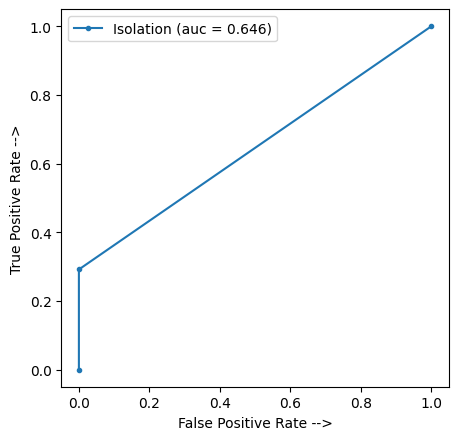

-1.0709718670076724
IsolationForest(contamination=0.1, max_features=9, max_samples=30,
                n_estimators=10, n_jobs=-1, random_state=5)


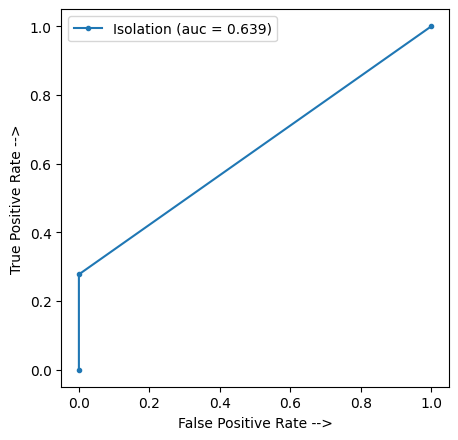

In [55]:
skf = StratifiedKFold(n_splits=2)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    param_grid ={'n_estimators' : [10, 50],
             'max_samples' : ['auto', 30],
             'contamination' : np.arange(0.1, 0.5, 0.1),
             'max_features' : [9],
             'bootstrap' : [False, True],
             'n_jobs' : [-1],
             'random_state' : [5],
             'verbose' :[0],
             'warm_start' :[False, True]}
    grid = GridSearchCV(IsolationForest(), param_grid, scoring ="neg_mean_squared_error", cv = 5)
    grid.fit(X_train, y_train)
    # on affiche les caractéristiques du meilleur modèle
    print(grid.best_score_)

    # on sauve le modèle pour le tester sur de nouvelles données
    model = grid.best_estimator_
    print(model)
    y_pred = model.fit_predict(X_test)

    # on ajuste les prédictions au définition de nos classes (0 : bénin, 1 = malin)
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    auc_isolation = auc(fpr, tpr)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(fpr, tpr, marker='.', label='Isolation (auc = %0.3f)' % auc_isolation)
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()

In [31]:
X_train.shape

(342, 9)

In [12]:
np.arange(0.1 ,0.5, 0.1)

array([0.1, 0.2, 0.3, 0.4])

In [16]:
# from sklearn.model_selection import GridSearchCV
# param_grid ={'n_estimators' : [10, 50],
#              'max_samples' : [30, 342],
#              'contamination' : np.arange(0.1, 0.5, 0.1),
#              'max_features' : [9],
#              'bootstrap' : [False, True],
#              'n_jobs' : [-1],
#              'random_state' : [5],
#              'verbose' :[0],
#              'warm_start' :[False, True]}
# grid = GridSearchCV(IsolationForest(), param_grid, scoring ="neg_mean_squared_error", cv = 5)
# grid.fit(X_train)
# # on affiche les caractéristiques du meilleur modèle
# grid.best_score_

# # on sauve le modèle pour le tester sur de nouvelles données
# model = grid.best_estimator_
# y_pred = model.fit_predict(X_test)

C:\Users\leo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\leo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\leo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\leo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__